# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({
    'Edad': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Retrasos': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

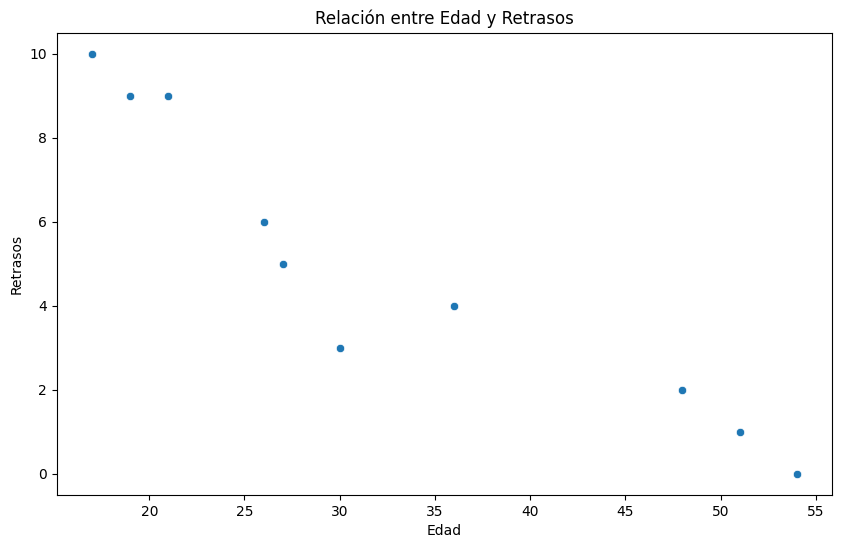

In [3]:
# Your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Retrasos', data=student_data)
plt.title('Relación entre Edad y Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Parece haber una tendencia negativa, lo que sugiere que a medida que la edad aumenta, los retrasos disminuyen.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [6]:
# your code here
covarianza = student_data.cov().loc['Edad', 'Retrasos']
correlacion = student_data.corr().loc['Edad', 'Retrasos']

covarianza , correlacion

(-45.56666666666667, -0.9391626886887121)

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [7]:
# your explanation here
modelo = smf.ols('Retrasos ~ Edad', data=student_data).fit()

modelo.summary()

C:\Users\Toni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retrasos   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           5.57e-05
Time:                        21:33:32   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Edad          -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Grafica tu modelo de regresión en tu diagrama de dispersión.

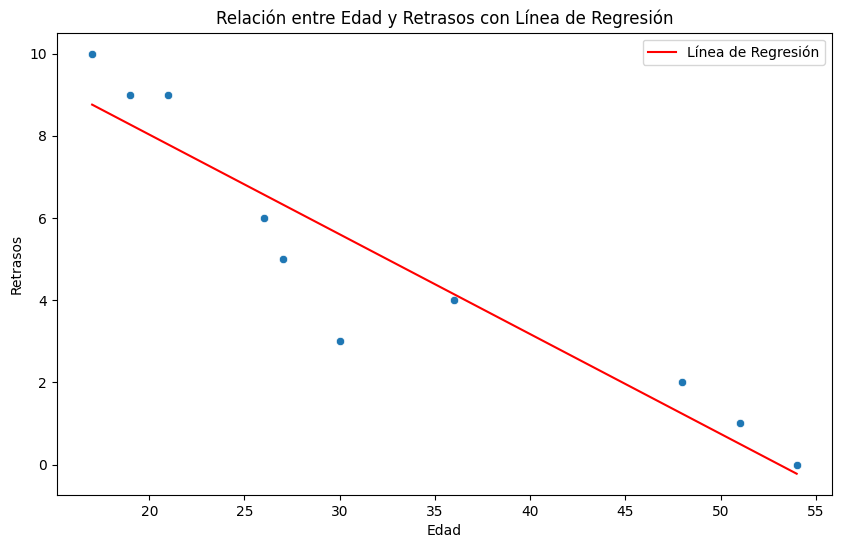

In [8]:
# Your code here.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Retrasos', data=student_data)
sns.lineplot(x=student_data['Edad'], y=modelo.fittedvalues, color='red', label='Línea de Regresión')
plt.title('Relación entre Edad y Retrasos con Línea de Regresión')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

La edad parece ser un buen predictor de la tardanza. Podemos estar razonablemente confiados en esta conclusión, dada la relación lineal observada y los resultados del modelo de regresión.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [13]:
# Your code here.
variables = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

correlaciones = variables.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)
correlaciones


CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [15]:
# Your code here.
modelo_vehiculos = smf.ols('Q("CO2 Emission Grams/Mile") ~ Year + Cylinders + Q("Fuel Barrels/Year") + Q("Combined MPG") + Q("Fuel Cost/Year")', data=vehicles).fit()

modelo_vehiculos_summary = modelo_vehiculos.summary()
modelo_vehiculos_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("CO2 Emission Grams/Mile")   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                                  21:38:54   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                769.8883     19.392     39.702      0.000     731.880     807.897
Year                      -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                  1.8788      0.083     22.598      0.000       1.716       2.042
Q("Fuel Barrels/Year")    19.0529      0.061    311.600      0.000      18.933      19.173
Q("Combined MPG")         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Q("Fuel Cost/Year")        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

Interpretación de los resultados del modelo de regresión
R-cuadrado (R-squared): 0.981, lo que indica que aproximadamente el 98.1% de la variabilidad en las emisiones de CO2 se puede explicar por las variables independientes.

Coeficientes:

Intercepto: 769.8883
Year: -0.3206 (relación negativa con las emisiones de CO2)
Cylinders: 1.8788 (relación positiva con las emisiones de CO2)
Fuel Barrels/Year: 19.0529 (relación positiva fuerte con las emisiones de CO2)
Combined MPG: -3.0404 (relación negativa fuerte con las emisiones de CO2)
Fuel Cost/Year: 0.0323 (relación positiva con las emisiones de CO2)
Significancia de los coeficientes: Todos los coeficientes tienen valores p muy bajos (0.000), lo que indica que son estadísticamente significativos.

Conclusiones
Variables más importantes:
Fuel Barrels/Year: Tiene el coeficiente más alto y es el predictor más fuerte de las emisiones de CO2.
Combined MPG: Tiene una fuerte relación negativa con las emisiones de CO2, lo que sugiere que un mejor rendimiento de combustible reduce las emisiones.
Confianza en el modelo: El alto valor de R-cuadrado y la significancia de los coeficientes sugieren que el modelo es robusto y confiable para predecir las emisiones de CO2.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*